#Preliminaries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm, metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import keras

#Data Loaders for SVM and ANN classifiers

In [4]:
root = '/content/drive/MyDrive/Transfer/Data'
classes = ['HC', 'I-I', 'L-L', 'M-M', 'R-R', 'T-I', 'T-L', 'T-M', 'T-R', 'T-T']

def read_data_svm(root, mode, Train_size=3):
  # sub_root = os.path.join(root, mode)
  sub_root = root
  subject = []
  label = []
  max = 20000

  if mode=='Train':
    lim = (1, Train_size)
  else:
    lim = (Train_size+1, 6) 

  iter = tqdm(sorted(os.listdir(sub_root)), total=len(sorted(os.listdir(sub_root))), desc="Reading data for SVM with splitpoint at "+str(Train_size))
  for sub_name in iter:
      path = os.path.join(sub_root, sub_name)

      if not 'EMG' in sub_name : continue 

      for name in sorted(os.listdir(path)):
        sub_path = os.path.join(path, name)

        num = (int)(name[-5])
        if num < lim[0] or num > lim[1]:
          continue

        for cl_name in classes:
          if cl_name in name:
            lab = classes.index(cl_name)
            label.append(lab)  
            break

        ds = pd.read_csv(sub_path, usecols = [0])
        ds_np = ds.to_numpy()
        ds_np = np.reshape(ds_np, (-1))
        # sub = np.ravel(sub)
        sub = ds_np

        if len(sub)<max:
          l = max-len(sub)
          pad = [0]*l
          pad = np.array(pad)
          pad = np.reshape(pad, (l,1))
          sub = np.append(sub, pad)

        if len(subject)>0:
          subject = np.vstack((subject, sub))
        else:
          subject = sub  

  label = np.array(label)
  
  return subject, label

def read_data_mlp(root, mode, Train_size=3):
  # sub_root = os.path.join(root, mode)
  sub_root = root
  subject = []
  label = []
  max = 20000

  if mode=='Train':
    lim = (1, Train_size)
  else:
    lim = (Train_size+1, 6) 

  iter = tqdm(sorted(os.listdir(sub_root)), total=len(sorted(os.listdir(sub_root))), desc="Reading data for MLP with splitpoint at "+str(Train_size))
  for sub_name in iter:
      path = os.path.join(sub_root, sub_name)

      if not 'EMG' in sub_name : continue 

      for name in sorted(os.listdir(path)):
        sub_path = os.path.join(path, name)

        num = (int)(name[-5])
        if num < lim[0] or num > lim[1]:
          continue

        for cl_name in classes:
          if cl_name in name:
            lab = classes.index(cl_name)
            # label.append(lab)  
            labl = np.zeros((1, 10))  
            labl[0, lab] = 1
            if len(label)>0:
              # print(label.shape)
              # print(labl.shape)
              # print('-'*100)
              label = np.vstack((label, labl))
            else:
              label = labl
            break

        ds = pd.read_csv(sub_path, usecols = [0])
        ds_np = ds.to_numpy()
        ds_np = np.reshape(ds_np, (-1))
        # sub = np.ravel(sub)
        sub = ds_np

        if len(sub)<max:
          l = max-len(sub)
          pad = [0]*l
          pad = np.array(pad)
          pad = np.reshape(pad, (l,1))
          sub = np.append(sub, pad)

        if len(subject)>0:
          subject = np.vstack((subject, sub))
        else:
          subject = sub  

  label = np.array(label)
  
  return subject, label

#Loading the data

In [5]:
data = {"svm":{"3_3":{}, "4_2":{}, "5_1":{}}, "ann":{"3_3":{}, "4_2":{}, "5_1":{}}}

print("Loading SVM and ANN data:")
for k in data["svm"].keys():
    print("  - Split: "+k)
    data["svm"][k]["train"] = read_data_svm(root, 'Train', int(k[0]))
    data["svm"][k]["test"] = read_data_svm(root, 'Test', int(k[0]))
    data["ann"][k]["train"] = read_data_mlp(root, 'Train', int(k[0]))
    data["ann"][k]["test"] = read_data_mlp(root, 'Test', int(k[0]))
  

Loading SVM and ANN data:
  - Split: 3_3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()


Reading data for SVM with splitpoint at 3:   0%|          | 0/16 [00:00<?, ?it/s]

Reading data for SVM with splitpoint at 3:   0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


Reading data for MLP with splitpoint at 3:   0%|          | 0/16 [00:00<?, ?it/s]

Reading data for MLP with splitpoint at 3:   0%|          | 0/16 [00:00<?, ?it/s]

  - Split: 4_2


Reading data for SVM with splitpoint at 4:   0%|          | 0/16 [00:00<?, ?it/s]

Reading data for SVM with splitpoint at 4:   0%|          | 0/16 [00:00<?, ?it/s]

Reading data for MLP with splitpoint at 4:   0%|          | 0/16 [00:00<?, ?it/s]

Reading data for MLP with splitpoint at 4:   0%|          | 0/16 [00:00<?, ?it/s]

  - Split: 5_1


Reading data for SVM with splitpoint at 5:   0%|          | 0/16 [00:00<?, ?it/s]

Reading data for SVM with splitpoint at 5:   0%|          | 0/16 [00:00<?, ?it/s]

Reading data for MLP with splitpoint at 5:   0%|          | 0/16 [00:00<?, ?it/s]

Reading data for MLP with splitpoint at 5:   0%|          | 0/16 [00:00<?, ?it/s]

#Utils

In [15]:
#PCA and LDA operation

def run_PCA(sub, num_features=100):
    pca = PCA()
    a = pca.fit_transform(sub)
    num = num_features
    b = a[:, :num]
    return b

def run_LDA(sub, lab, num=5):
    lda = LDA()
    a = lda.fit_transform(sub, lab)
    b = a[:, :num]
    return b

def visualize_svm_results(clf, test_sub, test_lab, split="3_3"):
    max = int(split[-1]) * 10.0
    y_pred = clf.predict(np.array(test_sub))
    print('Confusion Matrix')
    
    cf_matrix = confusion_matrix(np.array(test_lab), y_pred)
    df = pd.DataFrame(data=cf_matrix, columns=classes, index=classes)
    fig = plt.figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
    sns.set(font_scale=2.0)

    res = sns.heatmap(df, annot=True, vmin=-10.0, vmax=max, center=-10.0,
                    fmt='.0f', cmap='Greens', cbar=False, cbar_kws={"shrink": .82},
                    linewidths=0.6, linecolor='gray')

    res.set_ylabel("Label Axis")
    res.set_xlabel("Prediction Axis")

    plt.show()
    plt.clf()

def visualize_ann_results(test_sub, test_lab, split="3_3"):
    max = int(split[-1]) * 10.0
    Y_pred = model_nn.predict(np.array(test_sub))
    y_pred = np.argmax(Y_pred, axis=1)
    Test_lab = np.argmax(test_lab, axis=1)
    print('Confusion Matrix')
    
    cf_matrix = confusion_matrix(np.array(Test_lab), y_pred)
    df = pd.DataFrame(data=cf_matrix, columns=classes, index=classes)
    fig = plt.figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
    sns.set(font_scale=2.0)

    res = sns.heatmap(df, annot=True, vmin=-10.0, vmax=max, center=-10.0,
                    fmt='.0f', cmap='Reds', cbar=False, cbar_kws={"shrink": .82},
                    linewidths=0.1, linecolor='gray')

    res.set_ylabel("Label Axis")
    res.set_xlabel("Prediction Axis")

    plt.show()
    plt.clf()
    return Test_lab, y_pred

#SVM Fitting

(300, 20000) (300, 20000) (300,) (300,)
(300, 20000) (300, 20000) (300,) (300,)
Confusion Matrix


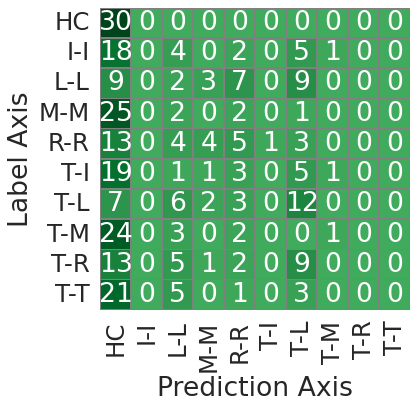

svm_3_3
              precision    recall  f1-score   support

           0       0.17      1.00      0.29        30
           1       0.00      0.00      0.00        30
           2       0.06      0.07      0.06        30
           3       0.00      0.00      0.00        30
           4       0.19      0.17      0.18        30
           5       0.00      0.00      0.00        30
           6       0.26      0.40      0.31        30
           7       0.33      0.03      0.06        30
           8       0.00      0.00      0.00        30
           9       0.00      0.00      0.00        30

    accuracy                           0.17       300
   macro avg       0.10      0.17      0.09       300
weighted avg       0.10      0.17      0.09       300

(300, 20000) (300, 20000) (300,) (300,)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(300, 100) (300, 100) (300,) (300,)
Confusion Matrix


<Figure size 432x288 with 0 Axes>

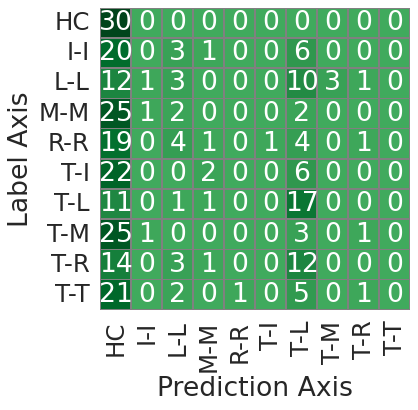

svm_pca_3_3
              precision    recall  f1-score   support

           0       0.15      1.00      0.26        30
           1       0.00      0.00      0.00        30
           2       0.17      0.10      0.12        30
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00        30
           5       0.00      0.00      0.00        30
           6       0.26      0.57      0.36        30
           7       0.00      0.00      0.00        30
           8       0.00      0.00      0.00        30
           9       0.00      0.00      0.00        30

    accuracy                           0.17       300
   macro avg       0.06      0.17      0.07       300
weighted avg       0.06      0.17      0.07       300

(300, 20000) (300, 20000) (300,) (300,)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(300, 5) (300, 5) (300,) (300,)
Confusion Matrix


<Figure size 432x288 with 0 Axes>

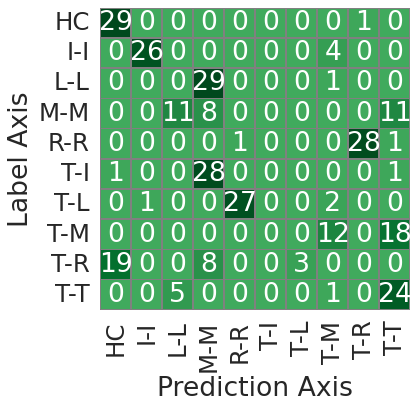

svm_lda_3_3
              precision    recall  f1-score   support

           0       0.59      0.97      0.73        30
           1       0.96      0.87      0.91        30
           2       0.00      0.00      0.00        30
           3       0.11      0.27      0.16        30
           4       0.04      0.03      0.03        30
           5       0.00      0.00      0.00        30
           6       0.00      0.00      0.00        30
           7       0.60      0.40      0.48        30
           8       0.00      0.00      0.00        30
           9       0.44      0.80      0.56        30

    accuracy                           0.33       300
   macro avg       0.27      0.33      0.29       300
weighted avg       0.27      0.33      0.29       300

(400, 20000) (200, 20000) (400,) (200,)
(400, 20000) (200, 20000) (400,) (200,)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix


<Figure size 432x288 with 0 Axes>

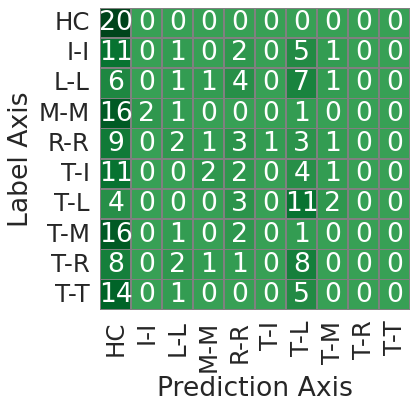

svm_4_2
              precision    recall  f1-score   support

           0       0.17      1.00      0.30        20
           1       0.00      0.00      0.00        20
           2       0.11      0.05      0.07        20
           3       0.00      0.00      0.00        20
           4       0.18      0.15      0.16        20
           5       0.00      0.00      0.00        20
           6       0.24      0.55      0.34        20
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        20

    accuracy                           0.17       200
   macro avg       0.07      0.17      0.09       200
weighted avg       0.07      0.17      0.09       200

(400, 20000) (200, 20000) (400,) (200,)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(400, 100) (200, 100) (400,) (200,)
Confusion Matrix


<Figure size 432x288 with 0 Axes>

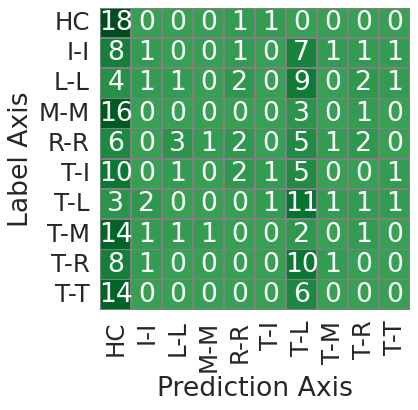

svm_pca_4_2
              precision    recall  f1-score   support

           0       0.18      0.90      0.30        20
           1       0.17      0.05      0.08        20
           2       0.17      0.05      0.08        20
           3       0.00      0.00      0.00        20
           4       0.25      0.10      0.14        20
           5       0.33      0.05      0.09        20
           6       0.19      0.55      0.28        20
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        20

    accuracy                           0.17       200
   macro avg       0.13      0.17      0.10       200
weighted avg       0.13      0.17      0.10       200

(400, 20000) (200, 20000) (400,) (200,)
(400, 5) (200, 5) (400,) (200,)
Confusion Matrix


<Figure size 432x288 with 0 Axes>

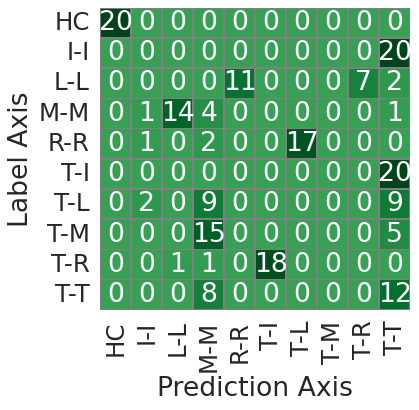

svm_lda_4_2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.10      0.20      0.14        20
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00        20
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00        20
           9       0.17      0.60      0.27        20

    accuracy                           0.18       200
   macro avg       0.13      0.18      0.14       200
weighted avg       0.13      0.18      0.14       200

(500, 20000) (100, 20000) (500,) (100,)
(500, 20000) (100, 20000) (500,) (100,)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix


<Figure size 432x288 with 0 Axes>

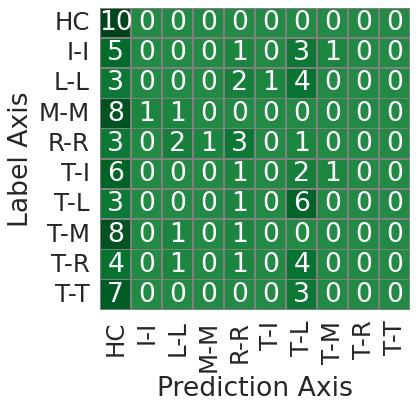

svm_5_1
              precision    recall  f1-score   support

           0       0.18      1.00      0.30        10
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        10
           4       0.30      0.30      0.30        10
           5       0.00      0.00      0.00        10
           6       0.26      0.60      0.36        10
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        10

    accuracy                           0.19       100
   macro avg       0.07      0.19      0.10       100
weighted avg       0.07      0.19      0.10       100

(500, 20000) (100, 20000) (500,) (100,)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(500, 100) (100, 100) (500,) (100,)
Confusion Matrix


<Figure size 432x288 with 0 Axes>

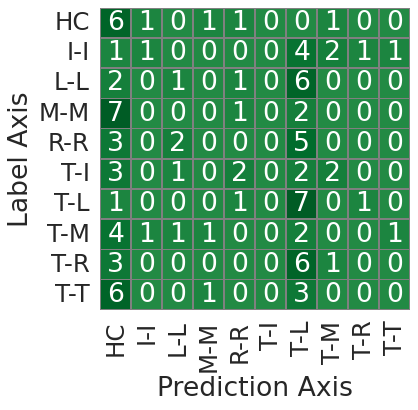

svm_pca_5_1
              precision    recall  f1-score   support

           0       0.17      0.60      0.26        10
           1       0.33      0.10      0.15        10
           2       0.20      0.10      0.13        10
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        10
           6       0.19      0.70      0.30        10
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        10

    accuracy                           0.15       100
   macro avg       0.09      0.15      0.08       100
weighted avg       0.09      0.15      0.08       100

(500, 20000) (100, 20000) (500,) (100,)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(500, 5) (100, 5) (500,) (100,)
Confusion Matrix


<Figure size 432x288 with 0 Axes>

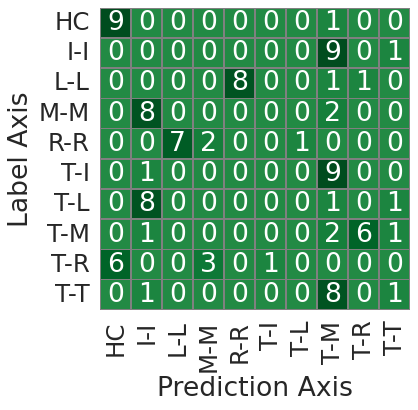

svm_lda_5_1
              precision    recall  f1-score   support

           0       0.60      0.90      0.72        10
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        10
           7       0.06      0.20      0.09        10
           8       0.00      0.00      0.00        10
           9       0.25      0.10      0.14        10

    accuracy                           0.12       100
   macro avg       0.09      0.12      0.10       100
weighted avg       0.09      0.12      0.10       100



<Figure size 432x288 with 0 Axes>

In [16]:
#Choose split

#split = "3_3"

splits = ["3_3", "4_2", "5_1"]
cases = ["", "_pca", "_lda"]

for split in splits:
    for case in cases:
        sub, lab = data["svm"][split]["train"]
        test_sub, test_lab = data["svm"][split]["test"]
        train_x = sub
        train_y = lab
        test_x  = test_sub
        test_y  = test_lab
        print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)
        if case == "_pca":
            sub_pca = run_PCA(sub)
            test_sub_pca = run_PCA(test_sub)
            train_x = sub_pca
            test_x  = test_sub_pca

        if case == "_lda":
            sub_lda = run_LDA(sub, lab)
            test_sub_lda = run_LDA(test_sub, test_lab)
            train_x = sub_lda
            test_x  = test_sub_lda
        print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)
        clf = svm.SVC()
        clf.fit(train_x, train_y)

        test_pred = clf.predict(test_x)

        visualize_svm_results(clf, test_x, test_y, split)
        print("svm"+case+"_"+split)
        report = metrics.classification_report(test_y, test_pred)
        print(report)

In [ ]:
# looped SVM runs



#ANN Data Selection

In [ ]:
#Choose split

split = "3_3"

sub, lab = data["ann"][split]["train"]
test_sub, test_lab = data["ann"][split]["test"]

sub_pca = run_PCA(sub)
test_sub_pca = run_PCA(test_sub)

sub_lda = run_LDA(sub, data["svm"][split]["train"][1])
test_sub_lda = run_LDA(test_sub, data["svm"][split]["test"][1])

#Data selection

train_x = sub
train_y = lab
test_x  = test_sub
test_y  = test_lab

#ANN Model Initialization and Training

In [17]:
model_dict = {
    "m1": keras.Sequential([
            keras.layers.Dense(units=5,activation="relu"),
            keras.layers.Dense(units=128,activation="relu"),
            keras.layers.Dense(units=10, activation="softmax")
        ]),
    "m2": keras.Sequential([
            keras.layers.Dense(units=9,activation="relu"),
            keras.layers.Dense(units=512,activation="relu"),
            keras.layers.Dense(units=10, activation="softmax")
        ]),
    "m3": keras.Sequential([
            keras.layers.Dense(units=5,activation="relu"),
            keras.layers.Dense(units=2048,activation="relu"),
            keras.layers.Dense(units=256,activation="relu"),
            keras.layers.Dense(units=10, activation="softmax")
        ]),
    "m4": keras.Sequential([
            keras.layers.Dense(units=5,activation="relu"),
            keras.layers.Dense(units=2048,activation="relu"),
            keras.layers.Dense(units=10, activation="softmax")
        ]),
    "m5": keras.Sequential([
            keras.layers.Dense(units=5,activation="relu"),
            keras.layers.Dense(units=2048,activation="relu"),
            keras.layers.Dense(units=256,activation="relu"),
            keras.layers.Dense(units=10, activation="softmax")
        ]),
    "m6": keras.Sequential([
            keras.layers.Dense(units=5,activation="relu"),
            keras.layers.Dense(units=2048,activation="relu"),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(units=256,activation="relu"),
            keras.layers.Dense(units=10, activation="softmax")
        ])
}

model_nn = model_dict["m6"]

model_nn.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [ ]:
hist = model_nn.fit(x=np.array(train_x), 
                  y=np.array(train_y),
                  epochs=50, 
                  verbose=1,
                  batch_size=1,                    
                  validation_data=(np.array(test_x), np.array(test_y)),
                  )

Epoch 1/50
300/300 [==============================] - 4s 10ms/step - loss: 0.3612 - accuracy: 0.0533 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.3295 - val_accuracy: 0.1000 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 2/50
300/300 [==============================] - 3s 10ms/step - loss: 0.3333 - accuracy: 0.0600 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.3271 - val_accuracy: 0.1000 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 3/50
300/300 [==============================] - 3s 9ms/step - loss: 0.3317 - accuracy: 0.0667 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.3288 - val_accuracy: 0.1000 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 4/50
300/300 [==============================] - 3s 9ms/step - loss: 0.3314 - accuracy: 0.0700 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.3287 - val_accuracy: 0.1000 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 

Text(0.5, 0, 'Epoch')

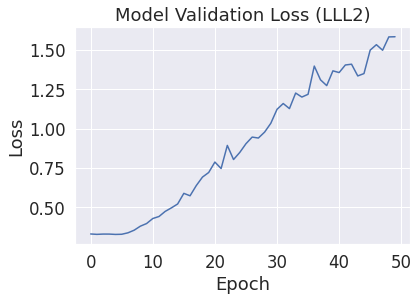

In [ ]:

plt.plot(hist.history['val_loss'])

plt.title('Model Validation Loss (LLL2)')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

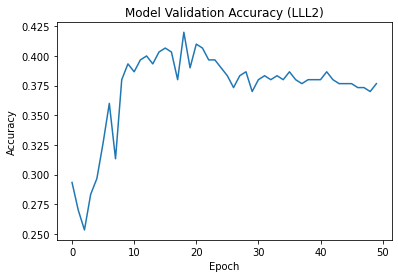

In [ ]:
plt.plot(hist.history['val_accuracy'])

plt.title('Model Validation Accuracy (LLL2)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')


Text(0.5, 0, 'Epoch')

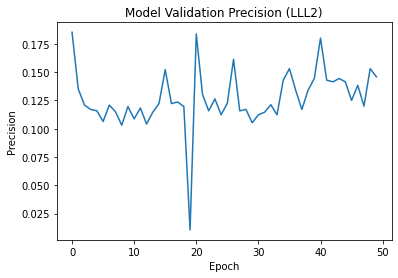

In [ ]:
plt.plot(hist.history['val_precision_17'])

plt.title('Model Validation Precision (LLL2)')
plt.ylabel('Precision')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

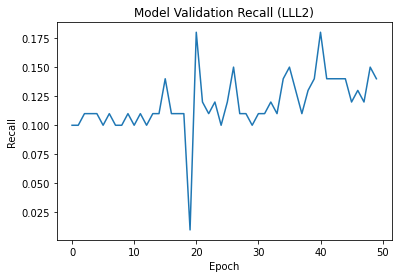

In [ ]:
plt.plot(hist.history['val_recall_17'])

plt.title('Model Validation Recall (LLL2)')
plt.ylabel('Recall')
plt.xlabel('Epoch')


#Visualizations

Confusion Matrix


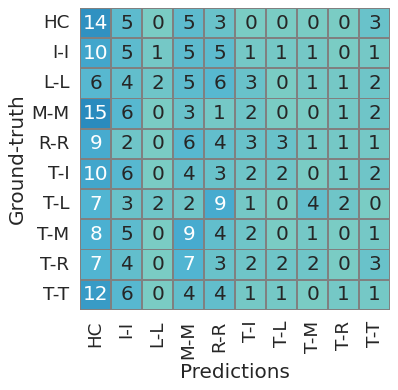

              precision    recall  f1-score   support

           0       0.14      0.47      0.22        30
           1       0.11      0.17      0.13        30
           2       0.40      0.07      0.11        30
           3       0.06      0.10      0.07        30
           4       0.10      0.13      0.11        30
           5       0.12      0.07      0.09        30
           6       0.00      0.00      0.00        30
           7       0.10      0.03      0.05        30
           8       0.00      0.00      0.00        30
           9       0.06      0.03      0.04        30

    accuracy                           0.11       300
   macro avg       0.11      0.11      0.08       300
weighted avg       0.11      0.11      0.08       300



<Figure size 432x288 with 0 Axes>

In [ ]:
ty, test_pred = visualize_ann_results(test_x, test_y)
report = metrics.classification_report(ty, test_pred)
print(report)

(300, 20000) (300, 20000) (300, 10) (300, 10)
(300, 20000) (300, 20000) (300, 10) (300, 10)
Epoch 1/50
300/300 [==============================] - 4s 9ms/step - loss: 0.3572 - accuracy: 0.0667 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.3280 - val_accuracy: 0.1000 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/50
300/300 [==============================] - 2s 7ms/step - loss: 0.3311 - accuracy: 0.0867 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.3285 - val_accuracy: 0.1000 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/50
300/300 [==============================] - 2s 7ms/step - loss: 0.3302 - accuracy: 0.1000 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.3283 - val_accuracy: 0.1000 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/50
300/300 [==============================] - 2s 7ms/step - loss: 0.3296 - accuracy: 0.1000 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.3

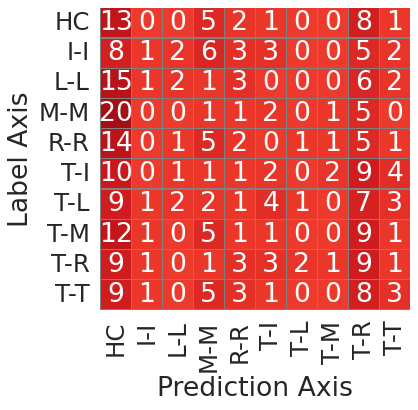

ann_3_3
              precision    recall  f1-score   support

           0       0.11      0.43      0.17        30
           1       0.17      0.03      0.06        30
           2       0.25      0.07      0.11        30
           3       0.03      0.03      0.03        30
           4       0.10      0.07      0.08        30
           5       0.12      0.07      0.09        30
           6       0.25      0.03      0.06        30
           7       0.00      0.00      0.00        30
           8       0.13      0.30      0.18        30
           9       0.17      0.10      0.12        30

    accuracy                           0.11       300
   macro avg       0.13      0.11      0.09       300
weighted avg       0.13      0.11      0.09       300

(300, 20000) (300, 20000) (300, 10) (300, 10)
(300, 100) (300, 100) (300, 10) (300, 10)
Epoch 1/50
300/300 [==============================] - 3s 7ms/step - loss: 0.3542 - accuracy: 0.0933 - precision_2: 0.0000e+00 - recall_2: 0.0000e

<Figure size 432x288 with 0 Axes>

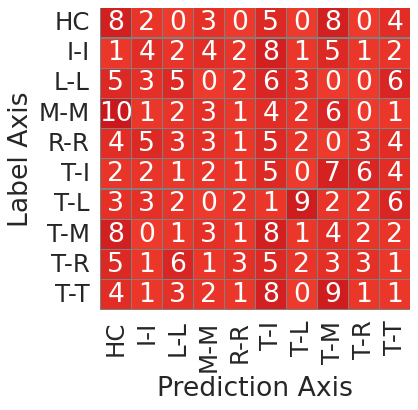

ann_pca_3_3
              precision    recall  f1-score   support

           0       0.16      0.27      0.20        30
           1       0.18      0.13      0.15        30
           2       0.20      0.17      0.18        30
           3       0.14      0.10      0.12        30
           4       0.07      0.03      0.05        30
           5       0.09      0.17      0.12        30
           6       0.45      0.30      0.36        30
           7       0.09      0.13      0.11        30
           8       0.17      0.10      0.12        30
           9       0.03      0.03      0.03        30

    accuracy                           0.14       300
   macro avg       0.16      0.14      0.14       300
weighted avg       0.16      0.14      0.14       300

(300, 20000) (300, 20000) (300, 10) (300, 10)
(300, 5) (300, 5) (300, 10) (300, 10)
Epoch 1/50
300/300 [==============================] - 3s 8ms/step - loss: 0.2123 - accuracy: 0.5900 - precision_3: 0.7904 - recall_3: 0.4400 - va

<Figure size 432x288 with 0 Axes>

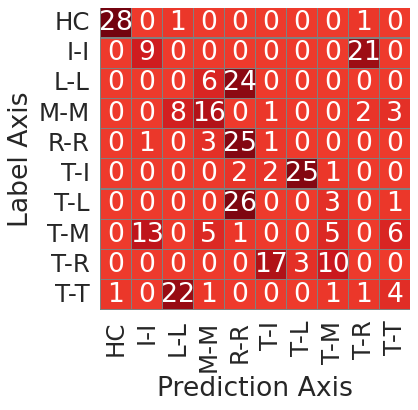

ann_lda_3_3
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       0.39      0.30      0.34        30
           2       0.00      0.00      0.00        30
           3       0.52      0.53      0.52        30
           4       0.32      0.83      0.46        30
           5       0.10      0.07      0.08        30
           6       0.00      0.00      0.00        30
           7       0.25      0.17      0.20        30
           8       0.00      0.00      0.00        30
           9       0.29      0.13      0.18        30

    accuracy                           0.30       300
   macro avg       0.28      0.30      0.27       300
weighted avg       0.28      0.30      0.27       300

(400, 20000) (200, 20000) (400, 10) (200, 10)
(400, 20000) (200, 20000) (400, 10) (200, 10)
Epoch 1/50
400/400 [==============================] - 4s 7ms/step - loss: 0.3512 - accuracy: 0.0750 - precision_4: 0.0000e+00 - recall_4:

<Figure size 432x288 with 0 Axes>

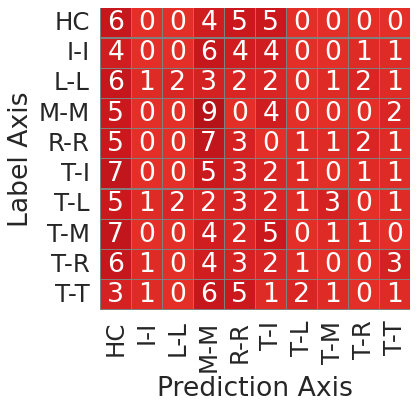

ann_4_2
              precision    recall  f1-score   support

           0       0.11      0.30      0.16        20
           1       0.00      0.00      0.00        20
           2       0.50      0.10      0.17        20
           3       0.18      0.45      0.26        20
           4       0.10      0.15      0.12        20
           5       0.07      0.10      0.09        20
           6       0.17      0.05      0.08        20
           7       0.14      0.05      0.07        20
           8       0.00      0.00      0.00        20
           9       0.09      0.05      0.06        20

    accuracy                           0.12       200
   macro avg       0.14      0.13      0.10       200
weighted avg       0.14      0.12      0.10       200

(400, 20000) (200, 20000) (400, 10) (200, 10)
(400, 100) (200, 100) (400, 10) (200, 10)
Epoch 1/50
400/400 [==============================] - 4s 7ms/step - loss: 0.3473 - accuracy: 0.1100 - precision_5: 0.0000e+00 - recall_5: 0.0000e

<Figure size 432x288 with 0 Axes>

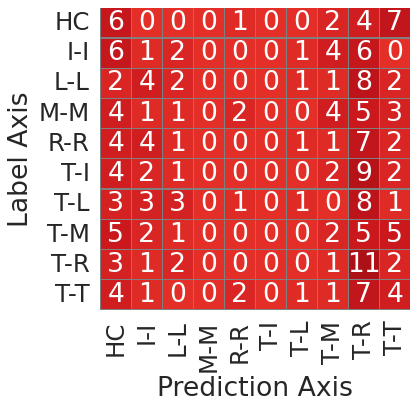

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ann_pca_4_2
              precision    recall  f1-score   support

           0       0.15      0.30      0.20        20
           1       0.05      0.05      0.05        20
           2       0.15      0.10      0.12        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00        20
           6       0.20      0.05      0.08        20
           7       0.11      0.10      0.11        20
           8       0.16      0.55      0.24        20
           9       0.14      0.20      0.17        20

    accuracy                           0.14       200
   macro avg       0.10      0.13      0.10       200
weighted avg       0.10      0.14      0.10       200

(400, 20000) (200, 20000) (400, 10) (200, 10)
(400, 5) (200, 5) (400, 10) (200, 10)
Epoch 1/50
400/400 [==============================] - 4s 7ms/step - loss: 0.2046 - accuracy: 0.6400 - precision_6: 0.8694 - recall_6: 0.4825 - va

<Figure size 432x288 with 0 Axes>

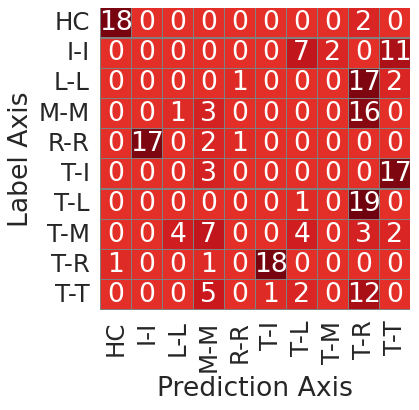

ann_lda_4_2
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.14      0.15      0.15        20
           4       0.50      0.05      0.09        20
           5       0.00      0.00      0.00        20
           6       0.07      0.05      0.06        20
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        20

    accuracy                           0.12       200
   macro avg       0.17      0.12      0.12       200
weighted avg       0.17      0.12      0.12       200

(500, 20000) (100, 20000) (500, 10) (100, 10)
(500, 20000) (100, 20000) (500, 10) (100, 10)
Epoch 1/50
500/500 [==============================] - 4s 7ms/step - loss: 0.3454 - accuracy: 0.0960 - precision_7: 0.0000e+00 - recall_7:

<Figure size 432x288 with 0 Axes>

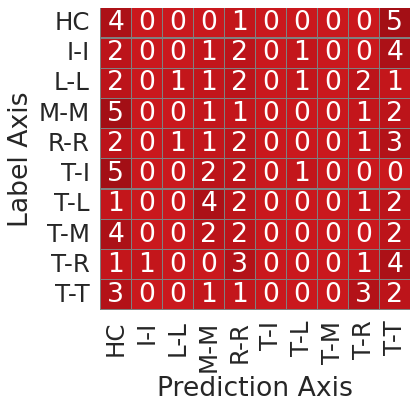

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ann_5_1
              precision    recall  f1-score   support

           0       0.14      0.40      0.21        10
           1       0.00      0.00      0.00        10
           2       0.50      0.10      0.17        10
           3       0.08      0.10      0.09        10
           4       0.11      0.20      0.14        10
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        10
           8       0.11      0.10      0.11        10
           9       0.08      0.20      0.11        10

    accuracy                           0.11       100
   macro avg       0.10      0.11      0.08       100
weighted avg       0.10      0.11      0.08       100

(500, 20000) (100, 20000) (500, 10) (100, 10)
(500, 100) (100, 100) (500, 10) (100, 10)
Epoch 1/50
500/500 [==============================] - 4s 6ms/step - loss: 0.3455 - accuracy: 0.0920 - precision_8: 0.0000e+00 - recall_8: 0.0000e

<Figure size 432x288 with 0 Axes>

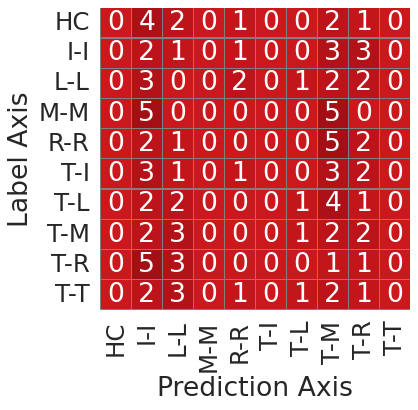

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ann_pca_5_1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.07      0.20      0.10        10
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        10
           6       0.25      0.10      0.14        10
           7       0.07      0.20      0.10        10
           8       0.07      0.10      0.08        10
           9       0.00      0.00      0.00        10

    accuracy                           0.06       100
   macro avg       0.05      0.06      0.04       100
weighted avg       0.05      0.06      0.04       100

(500, 20000) (100, 20000) (500, 10) (100, 10)
(500, 5) (100, 5) (500, 10) (100, 10)
Epoch 1/50
500/500 [==============================] - 4s 7ms/step - loss: 0.1738 - accuracy: 0.6500 - precision_9: 0.8066 - recall_9: 0.5840 - va

<Figure size 432x288 with 0 Axes>

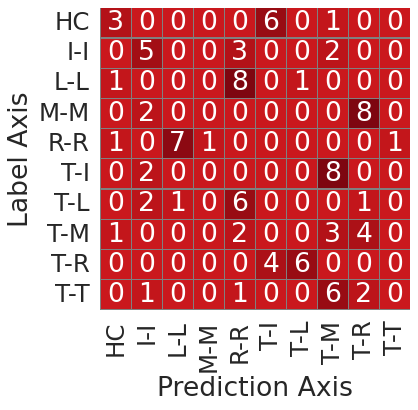

ann_lda_5_1
              precision    recall  f1-score   support

           0       0.50      0.30      0.37        10
           1       0.42      0.50      0.45        10
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        10
           7       0.15      0.30      0.20        10
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        10

    accuracy                           0.11       100
   macro avg       0.11      0.11      0.10       100
weighted avg       0.11      0.11      0.10       100



<Figure size 432x288 with 0 Axes>

In [18]:
#Ann runs


splits = ["3_3", "4_2", "5_1"]
cases = ["", "_pca", "_lda"]

for split in splits:
    for case in cases:
        sub, lab = data["ann"][split]["train"]
        test_sub, test_lab = data["ann"][split]["test"]
        train_x = sub
        train_y = lab
        test_x  = test_sub
        test_y  = test_lab
        print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)
        if case == "_pca":
            sub_pca = run_PCA(sub)
            test_sub_pca = run_PCA(test_sub)
            train_x = sub_pca
            test_x  = test_sub_pca

        if case == "_lda":
            sub_lda = run_LDA(sub, data["svm"][split]["train"][1])
            test_sub_lda = run_LDA(test_sub, data["svm"][split]["test"][1])
            train_x = sub_lda
            test_x  = test_sub_lda

        model_nn = keras.Sequential([
            keras.layers.Dense(units=5,activation="relu"),
            keras.layers.Dense(units=2048,activation="relu"),
            keras.layers.Dense(units=256,activation="relu"),
            keras.layers.Dense(units=10, activation="softmax")
        ])
        print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)
        model_nn.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])
        hist = model_nn.fit(x=np.array(train_x), 
                        y=np.array(train_y),
                        epochs=50, 
                        verbose=1,
                        batch_size=1,                    
                        validation_data=(np.array(test_x), np.array(test_y))
                        )

        ty, test_pred = visualize_ann_results(test_x, test_y, split)
        report = metrics.classification_report(ty, test_pred)
        print("ann"+case+"_"+split)
        print(report)